# `DTWSampler` Starter Guide

In this notebook, we will just explore an example of how `DTWSampler` resamples data using DTW alignments.

In [1]:
%pylab inline
import numpy
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from sampler import DTWSampler

# preparing data, nothing very interesting here...

data = []
data.append(numpy.loadtxt("data/Xi_ref.txt"))
data.append(numpy.loadtxt("data/Xi_0.txt"))
data.append(numpy.loadtxt("data/Xi_1.txt"))

d = data[0].shape[1]

max_sz = max([ts.shape[0] for ts in data])
npy_arr = numpy.zeros((len(data), max_sz, d)) + numpy.nan
for idx, ts in enumerate(data):
    sz = ts.shape[0]
    npy_arr[idx, :sz] = ts

Populating the interactive namespace from numpy and matplotlib


In [3]:
print(npy_arr.shape)

print(npy_arr[1, :, 0])

arr = numpy.zeros((10, 15, 2))
arr[:, :, 0] = dJ
arr[:, :, 1] = bleu



(3, 13, 3)
[ 213.542  246.465  327.89   471.31   478.38   436.063  419.943  405.082
  377.266  351.477  343.551      nan      nan]


As described in the README, data should a 2-dimensional array, so we should reshape it:

In [3]:
npy_arr = npy_arr.reshape(-1, max_sz * d)
print(npy_arr.shape)

(3, 39)


Now, we can fit our sampler:

In [7]:
s = DTWSampler(scaling_col_idx=0, reference_idx=0, d=d, interp_kind="linear")
transformed_array = s.fit_transform(npy_arr)

print(transformed_array.shape)

(3, 300)


Let us have a look at the transformation:

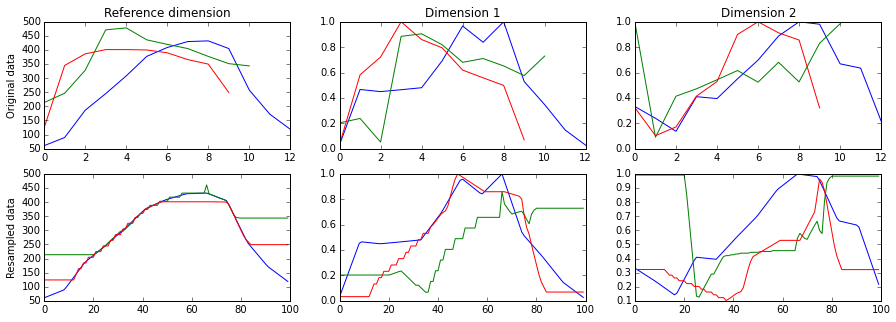

In [5]:
pylab.figure(figsize=(15,5))
for i in range(d):
    pylab.subplot(2, 3, i + 1)  # Original data
    if i == 0:
        pylab.title("Reference dimension")
    else:
        pylab.title("Dimension %d" % i)
    if i == 0:
        pylab.ylabel("Original data")
    for ts in npy_arr.reshape((len(data), -1, d)):
        sz = ts.shape[0]
        pylab.plot(numpy.arange(sz), ts[:, i])

    pylab.subplot(2, 3, i + d + 1)  # Transformed data
    if i == 0:
        pylab.ylabel("Resampled data")
    for ts in transformed_array.reshape((len(data), -1, d)):
        sz = ts.shape[0]
        pylab.plot(numpy.arange(sz), ts[:, i])
pylab.show()